##### Dependencies

In [90]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [91]:
raw_data = pd.read_csv('Dataset_Trabalho.csv', sep=';')
raw_data.describe()

# Create a dictionary to map string values to integers
mapping = {'Dropout': 0, 'Graduate': 1, 'Enrolled': 2}

# Use map() function to substitute string values with integers
raw_data['Target'] = raw_data['Target'].map(mapping)

raw_data.head(10)

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,0
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,1
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,0
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,1
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,1
5,2,39,1,9991,0,19,133.1,1,37,37,...,0,5,17,5,11.500000,5,16.2,0.3,-0.92,1
6,1,1,1,9500,1,1,142.0,1,19,38,...,0,8,8,8,14.345000,0,15.5,2.8,-4.06,1
7,1,18,4,9254,1,1,119.0,1,37,37,...,0,5,5,0,0.000000,0,15.5,2.8,-4.06,0
8,1,1,3,9238,1,1,137.0,62,1,1,...,0,6,7,6,14.142857,0,16.2,0.3,-0.92,1
9,1,1,1,9238,1,1,138.0,1,1,19,...,0,6,14,2,13.500000,0,8.9,1.4,3.51,0


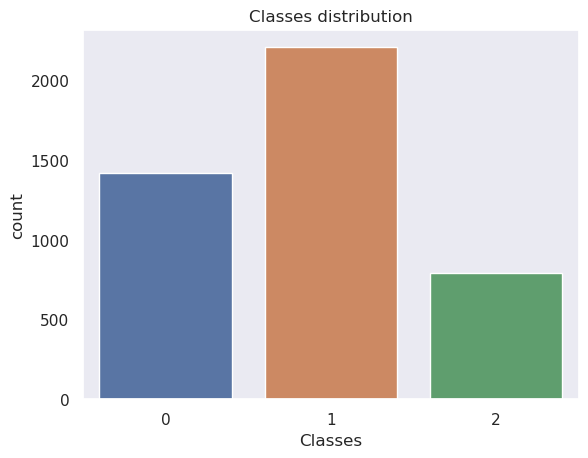

Distribution [Dropout, Graduate, Enrolled]:  [1421.0, 2209.0, 794.0]


In [92]:
sns.set_theme(style='dark')

ax = sns.countplot(x='Target', data=raw_data)
plt.title(f'Classes distribution')
plt.xlabel('Classes')
plt.show()

# Extract the counts from the countplot
x_labels = [tick.get_text() for tick in ax.get_xticklabels()]
counts = [rect.get_height() for rect in ax.patches]
print("Distribution [Dropout, Graduate, Enrolled]: ", counts)

##### Data Normalization (in use)

In [93]:
# copy the data
normalized_data = raw_data.copy()

# apply normalization techniques
for column in normalized_data.columns:
	normalized_data[column] = (normalized_data[column] - normalized_data[column].min()) / (normalized_data[column].max() - normalized_data[column].min())	

# view normalized data
normalized_data



,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,0.0,0.285714,0.555556,0.013858,1.0,0.0,0.284211,0.000000,0.418605,0.255814,...,0.0,0.000000,0.000000,0.00,0.000000,0.0,0.372093,0.488889,0.766182,0.0
1,0.0,0.250000,0.111111,0.925989,1.0,0.0,0.684211,0.000000,0.000000,0.046512,...,0.0,0.260870,0.181818,0.30,0.735897,0.0,0.732558,0.111111,0.640687,0.5
2,0.0,0.000000,0.555556,0.907512,1.0,0.0,0.284211,0.000000,0.837209,0.837209,...,0.0,0.260870,0.000000,0.00,0.000000,0.0,0.372093,0.488889,0.766182,0.0
3,0.0,0.285714,0.222222,0.978108,1.0,0.0,0.284211,0.000000,0.860465,0.837209,...,0.0,0.260870,0.303030,0.25,0.667692,0.0,0.209302,0.000000,0.124174,0.5
4,0.2,0.678571,0.111111,0.801466,0.0,0.0,0.052632,0.000000,0.837209,0.860465,...,0.0,0.260870,0.181818,0.30,0.700000,0.0,0.732558,0.111111,0.640687,0.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,0.0,0.000000,0.666667,0.978108,1.0,0.0,0.315789,0.000000,0.000000,0.000000,...,0.0,0.260870,0.242424,0.25,0.682051,0.0,0.918605,0.800000,0.000000,0.5
4420,0.0,0.000000,0.222222,0.978108,1.0,0.0,0.263158,0.962963,0.000000,0.000000,...,0.0,0.260870,0.181818,0.10,0.592308,0.0,0.406977,0.311111,0.803170,0.0
4421,0.0,0.000000,0.111111,0.950693,1.0,0.0,0.621053,0.000000,0.837209,0.837209,...,0.0,0.347826,0.272727,0.05,0.726923,0.0,0.732558,0.111111,0.640687,0.0
4422,0.0,0.000000,0.111111,0.915244,1.0,0.0,0.894737,0.000000,0.837209,0.837209,...,0.0,0.217391,0.181818,0.25,0.646154,0.0,0.209302,0.000000,0.124174,0.5


##### Data Standardization (not in use)

In [94]:
# copy the data
standardized_data = raw_data.copy()

# apply normalization techniques
for column in standardized_data.columns:
	standardized_data[column] = (standardized_data[column] -
						standardized_data[column].mean()) / standardized_data[column].std()	

# view normalized data
standardized_data

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,-0.294795,-0.095459,2.490614,-4.209044,0.350043,-0.350191,-0.804750,-0.126284,-0.036014,-0.669702,...,-0.28241,-2.838016,-2.042399,-1.471361,-1.963267,-0.199418,-0.287606,0.124372,0.765674,-1.237908
1,-0.294795,-0.209845,-0.554005,0.192559,0.350043,-0.350191,2.076585,-0.126284,-1.189625,-1.256285,...,-0.28241,-0.105714,-0.522623,0.518845,0.659487,-0.199418,0.876123,-1.105097,0.347160,0.204416
2,-0.294795,-1.010546,2.490614,0.103393,0.350043,-0.350191,-0.804750,-0.126284,1.117596,0.959694,...,-0.28241,-0.105714,-2.042399,-1.471361,-1.963267,-0.199418,-0.287606,0.124372,0.765674,-1.237908
3,-0.294795,-0.095459,0.207150,0.444065,0.350043,-0.350191,-0.804750,-0.126284,1.181686,0.959694,...,-0.28241,-0.105714,0.490561,0.187144,0.416403,-0.199418,-0.813161,-1.466705,-1.375356,0.204416
4,1.356059,1.162785,-0.554005,-0.408343,-2.856147,-0.350191,-2.472892,-0.126284,1.117596,1.024870,...,-0.28241,-0.105714,-0.522623,0.518845,0.531548,-0.199418,0.876123,-1.105097,0.347160,0.204416
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,-0.294795,-1.010546,3.251769,0.444065,0.350043,-0.350191,-0.577276,-0.126284,-1.189625,-1.386637,...,-0.28241,-0.105714,-0.016031,0.187144,0.467578,-0.199418,1.476757,1.136876,-1.789464,0.204416
4420,-0.294795,-1.010546,0.207150,0.444065,0.350043,-0.350191,-0.956399,14.914542,-1.189625,-1.386637,...,-0.28241,-0.105714,-0.522623,-0.807959,0.147730,-0.199418,-0.174987,-0.454201,0.889026,-1.237908
4421,-0.294795,-1.010546,-0.554005,0.311770,0.350043,-0.350191,1.621637,-0.126284,1.117596,0.959694,...,-0.28241,0.805053,0.237265,-1.139660,0.627502,-0.199418,0.876123,-1.105097,0.347160,-1.237908
4422,-0.294795,-1.010546,-0.554005,0.140707,0.350043,-0.350191,3.593077,-0.126284,1.117596,0.959694,...,-0.28241,-0.561098,-0.522623,0.187144,0.339639,-0.199418,-0.813161,-1.466705,-1.375356,0.204416


##### Correlation Matrix

/home/pareidrieds/anaconda3/lib/python3.10/site-packages/seaborn/utils.py:80: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.draw()
/home/raquel/.local/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


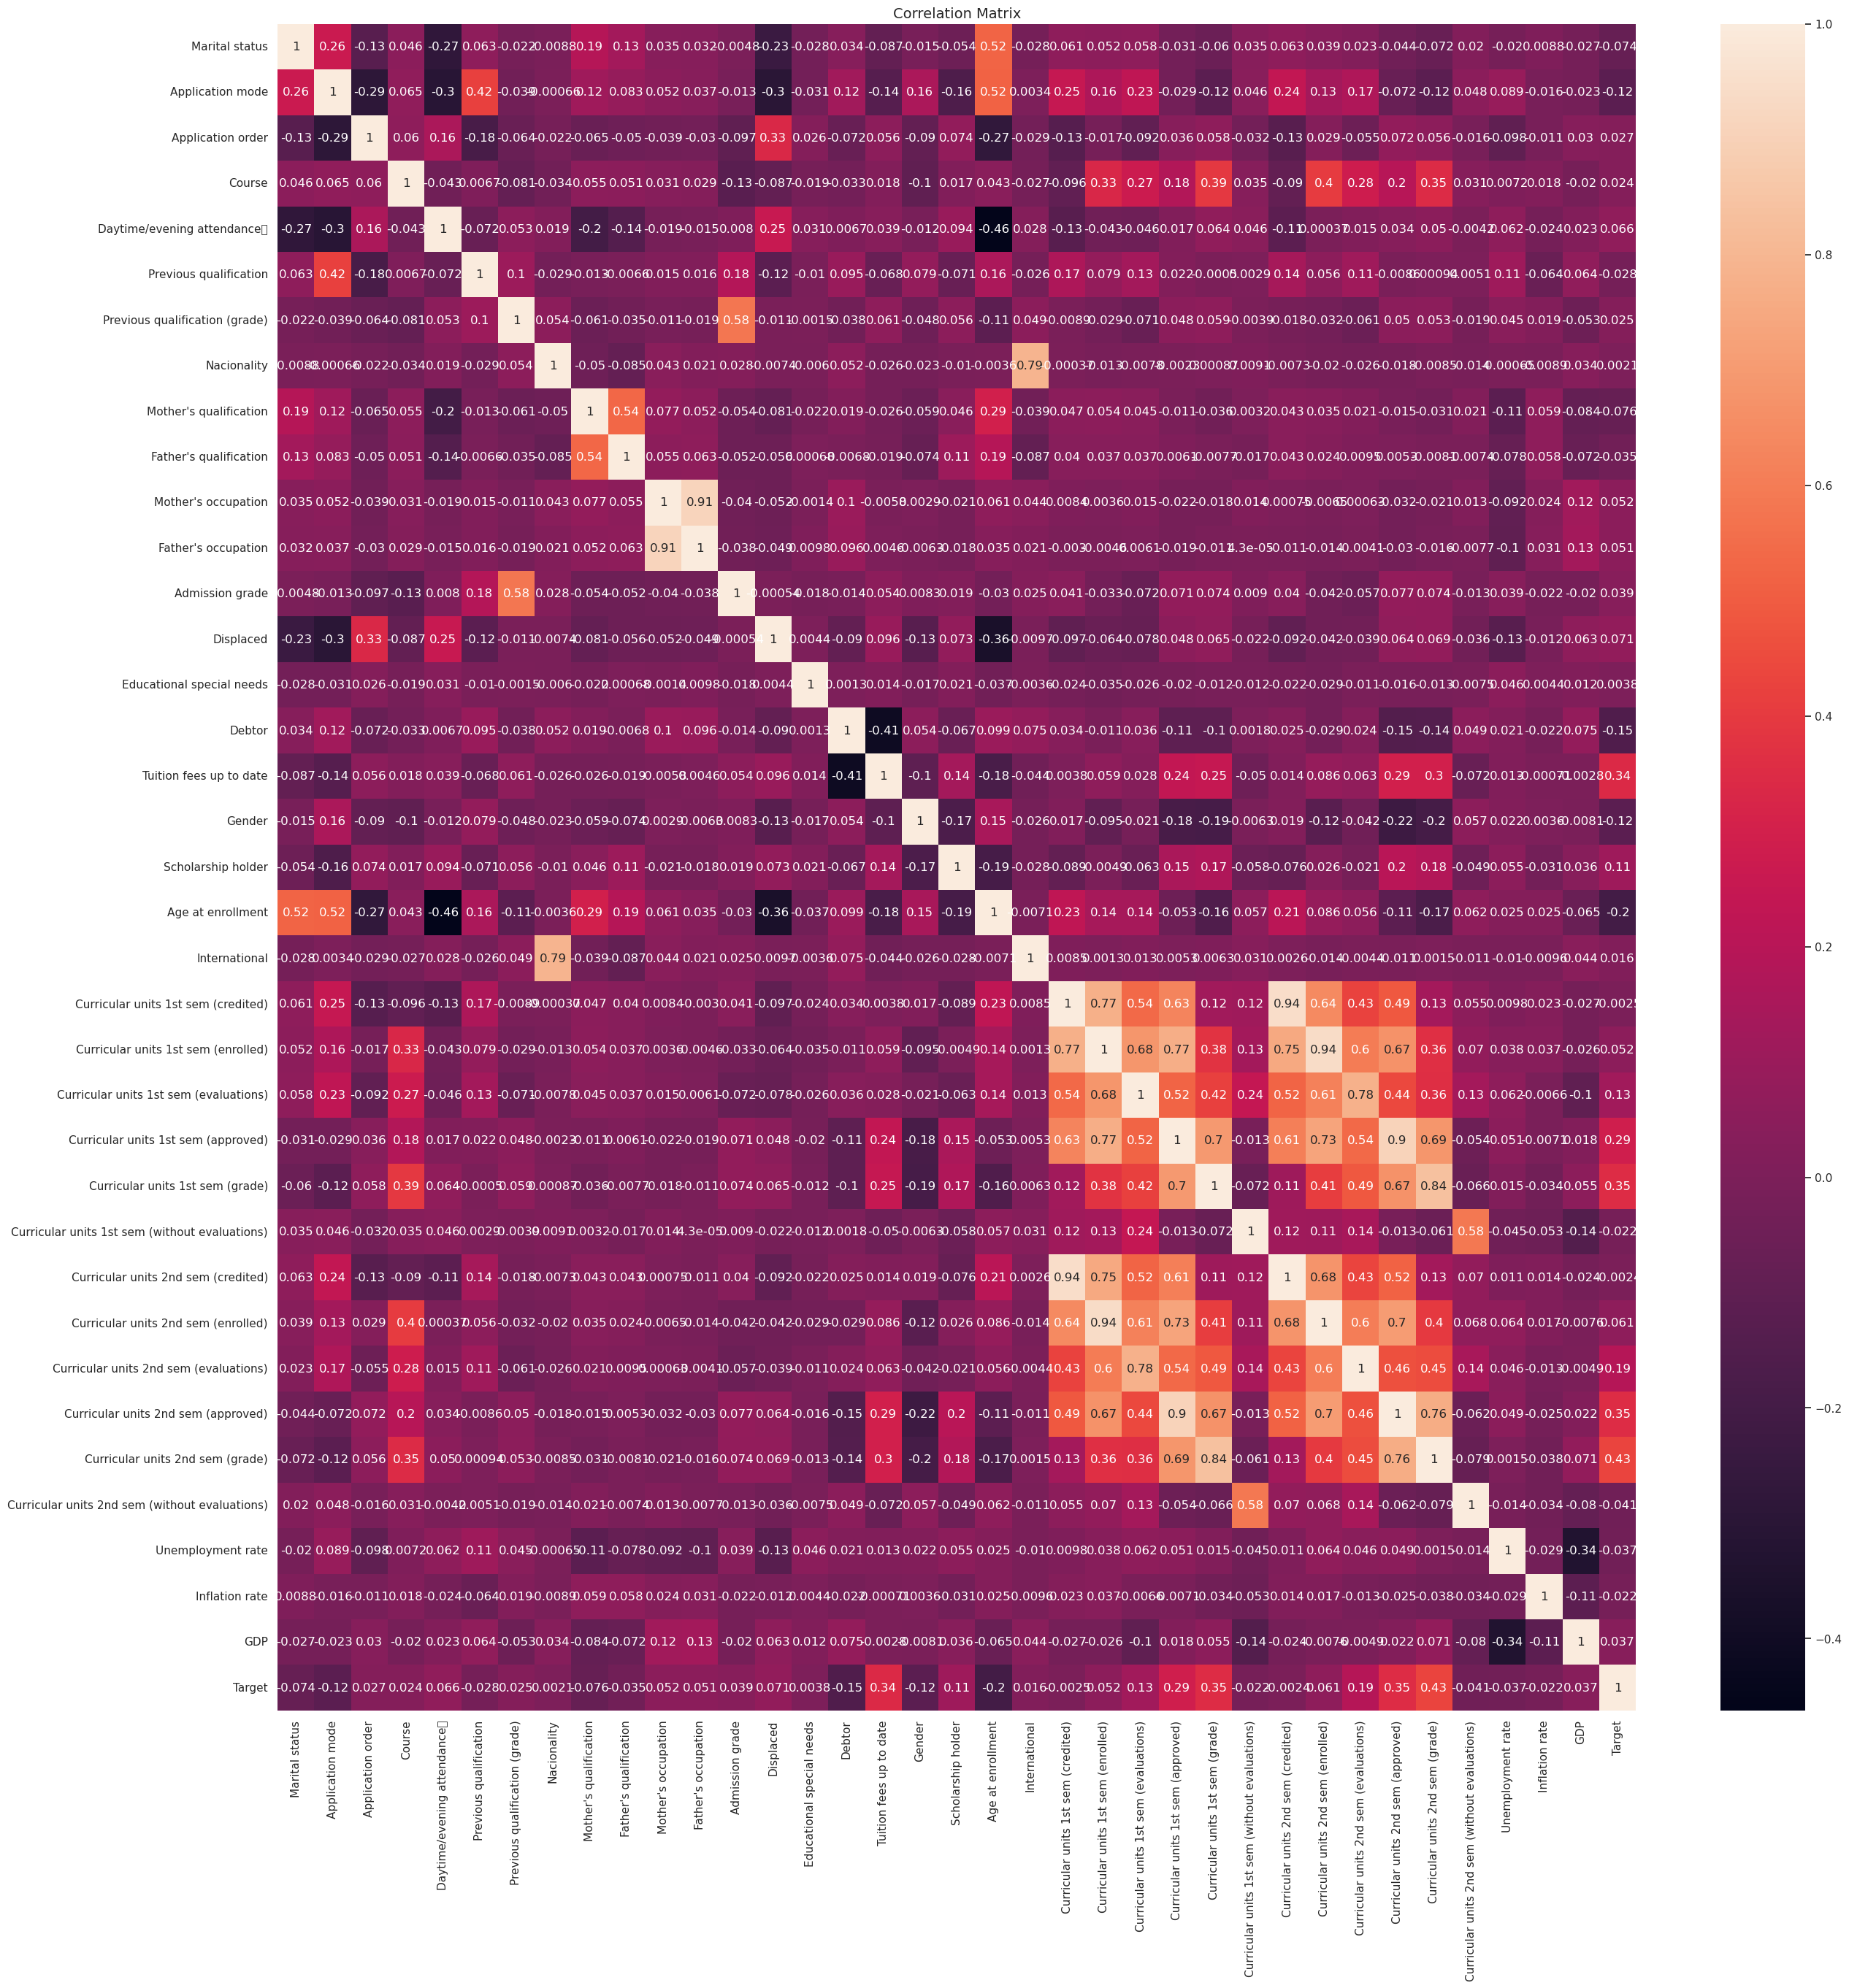

In [95]:
corr = normalized_data.corr()
sns.set_theme(style='dark')
f, ax = plt.subplots(figsize=(30, 30))
sns.heatmap(corr, annot=True, ax=ax)
plt.title('Correlation Matrix', fontsize=14)
plt.show()

##### Subsets definition

In [107]:
X = np.array(normalized_data.values[:, :-1])
y = raw_data.values[:, -1]

# from sklearn.feature_selection import SelectKBest
# from sklearn.feature_selection import f_classif
# X.shape
# X_new = SelectKBest(f_classif, k=10).fit_transform(X, y)
# X_new.shape

# splitting X and y into training and testing sets
X_train, X_test,\
	y_train, y_test = train_test_split(X, y,
									test_size=0.8,
									random_state=1)

# from imblearn.over_sampling import SMOTE
# smot = SMOTE()
# X_train, y_train = smot.fit_resample(X_train, y_train)

# # lets try oversampling too
# from imblearn.over_sampling import RandomOverSampler
# ros = RandomOverSampler()
# X_train, y_train = ros.fit_resample(X_train, y_train)

# # equal sampling now (check)
# fig = plt.figure()
# plot = pd.Series(y_train).value_counts().plot('bar', color=['green', 'blue', 'red'])  
# fig = plot.get_figure()



##### Logistic Regression training and testing

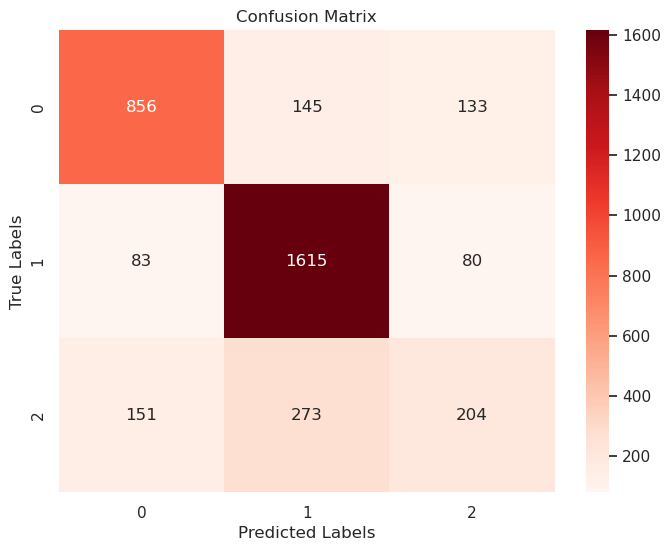

Accuracy: 0.7556497175141242
Precision: 0.7373466261483494
Recall: 0.7556497175141242


In [108]:
logreg = LogisticRegression(C=1e5, max_iter=1000000)
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test) 

cnf_matrix = metrics.confusion_matrix(y_test, y_pred) 

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cnf_matrix, annot=True, fmt="d", cmap="Reds")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

print("Accuracy:",metrics.accuracy_score(y_test, y_pred)) 

print("Precision:",metrics.precision_score(y_test, y_pred, average='weighted', zero_division=1)) 

print("Recall:",metrics.recall_score(y_test, y_pred, average='weighted', zero_division=1))

